##Importing all necessary libraries

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##Importing CSV files to DataFrame format

In [115]:
data1=pd.read_csv(r"/content/deliveries.csv")
dele=data1.copy()
data2=pd.read_csv(r"/content/matches.csv")
mat=data2.copy()

In [116]:
dele.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [117]:
mat.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [118]:
dele.drop_duplicates(inplace=True)

In [119]:
dele.duplicated().sum()

0

In [120]:
mat.drop_duplicates(inplace=True)

In [121]:
mat.duplicated().sum()

0

##The following is the right way to merge 2 datasets for getting better insights from the data

In [122]:
df = pd.merge(dele, mat, left_on='match_id', right_on='id', how='inner')

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179054
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

##Fielder has the highest number of missing values

In [125]:
column_with_most_missing_values=df.isnull().sum().idxmax()

print(f"The most missing values is in the column {column_with_most_missing_values}")

missing_info = df.isnull().apply(lambda x: pd.Series({'count': x.sum(), 'percentage': x.mean() * 100}))

Table=missing_info.T

print(Table)


The most missing values is in the column fielder
                     count  percentage
match_id               0.0    0.000000
inning                 0.0    0.000000
batting_team           0.0    0.000000
bowling_team           0.0    0.000000
over                   0.0    0.000000
ball                   0.0    0.000000
batsman                0.0    0.000000
non_striker            0.0    0.000000
bowler                 0.0    0.000000
is_super_over          0.0    0.000000
wide_runs              0.0    0.000000
bye_runs               0.0    0.000000
legbye_runs            0.0    0.000000
noball_runs            0.0    0.000000
penalty_runs           0.0    0.000000
batsman_runs           0.0    0.000000
extra_runs             0.0    0.000000
total_runs             0.0    0.000000
player_dismissed  170221.0   95.066320
dismissal_kind    170221.0   95.066320
fielder           172607.0   96.398872
id                     0.0    0.000000
season                 0.0    0.000000
city           

##City which hosted most number of seasons according to the data is: Delhi

In [126]:
top_hosted_city = df.groupby(by='city')['season'].nunique()

top_city= top_hosted_city.sort_values(ascending=False)

print(f"The city which hosted the most number of seasons is: {top_city.idxmax()}")

print(f"\n{top_city}")



The city which hosted the most number of seasons is: Delhi

city
Delhi             11
Mumbai            11
Kolkata           11
Hyderabad         10
Bangalore          9
Chandigarh         9
Chennai            8
Jaipur             7
Pune               6
Dharamsala         4
Visakhapatnam      4
Cuttack            3
Ranchi             3
Indore             3
Ahmedabad          3
Raipur             3
Rajkot             2
Kanpur             2
Bengaluru          2
Mohali             2
Nagpur             1
Sharjah            1
Port Elizabeth     1
Cape Town          1
Bloemfontein       1
Durban             1
Kochi              1
Kimberley          1
Johannesburg       1
Centurion          1
East London        1
Abu Dhabi          1
Name: season, dtype: int64


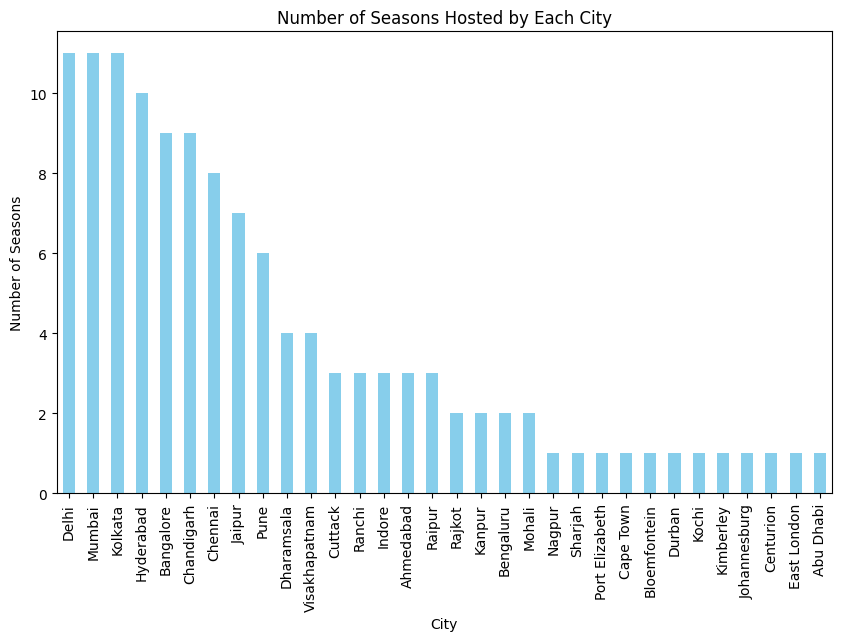

In [127]:
plt.figure(figsize=(10, 6))
top_city.plot(kind='bar', color='skyblue')
plt.title('Number of Seasons Hosted by Each City')
plt.xlabel('City')
plt.ylabel('Number of Seasons')
plt.show()

##The most number of matches played in the year 2013.

In [128]:
df['year'] = pd.to_datetime(df['date']).dt.year

matches_per_year=df.groupby('year')['match_id'].nunique()

print(f"The year in which the most number of matches played is: {matches_per_year.idxmax()}\n")

print(matches_per_year.sort_values(ascending=False))



The year in which the most number of matches played is: 2013

year
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: match_id, dtype: int64


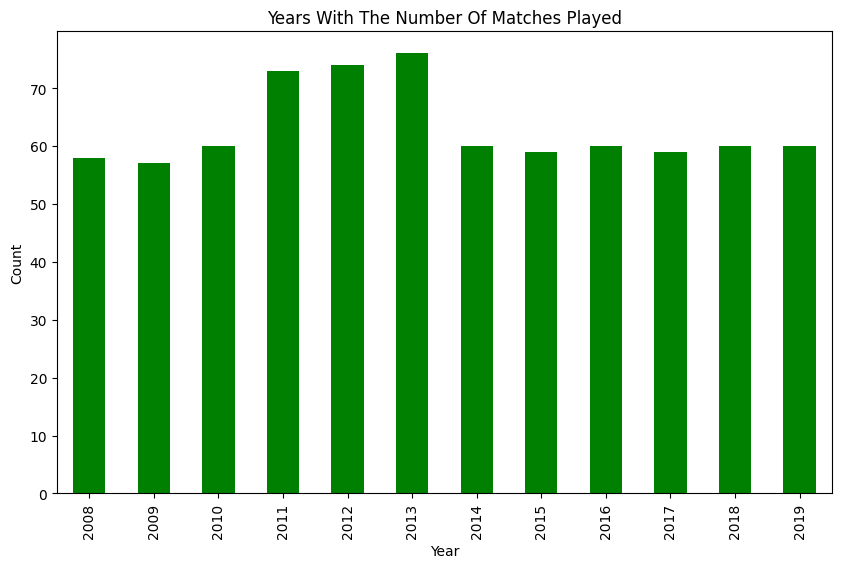

In [129]:
plt.figure(figsize=(10, 6))
matches_per_year.plot(kind='bar', color='green')
plt.title('Years With The Number Of Matches Played')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

##Maximum wins by Mumbai Indians in 2011 are 10

In [130]:
maximum_win_MI = df[(df['season']==2011) & (df['winner']=='Mumbai Indians')]['match_id'].nunique()

print(f"The maximum wins by Mumbai Indians in 2011 are = {maximum_win_MI}")

The maximum wins by Mumbai Indians in 2011 are = 10


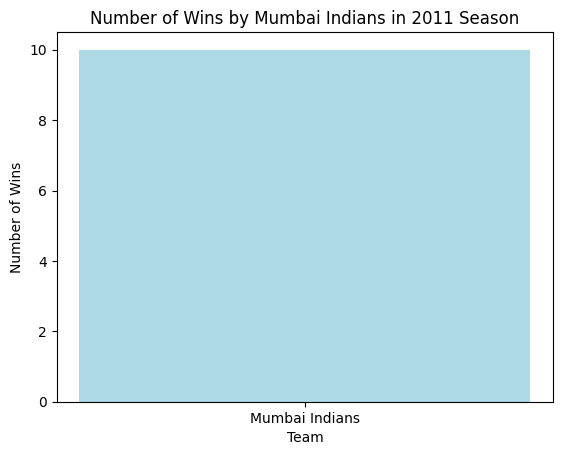

In [131]:
teams = ['Mumbai Indians']
wins = [maximum_win_MI]

plt.bar(teams, wins, color='lightblue')
plt.title('Number of Wins by Mumbai Indians in 2011 Season')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

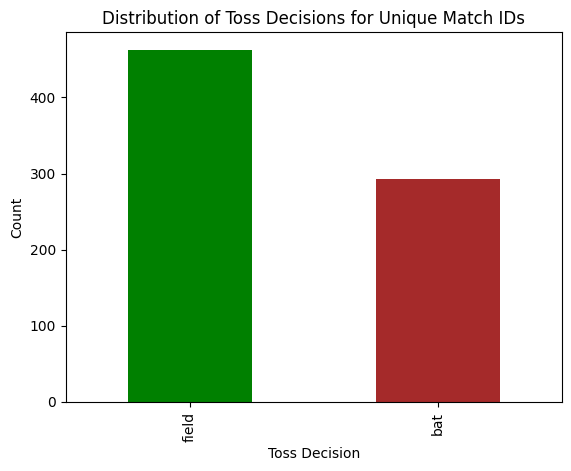

In [132]:
unique_matches = df[['match_id', 'toss_decision']].drop_duplicates()

unique_matches['toss_decision'].value_counts().plot(kind='bar', color=['green', 'brown'])
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Distribution of Toss Decisions for Unique Match IDs')
plt.show()

##The percentage of getting bat and field in 'toss_decision' feature is 39.01% for bat and 60.99% for field.


In [133]:
toss_decision_counts = df['toss_decision'].value_counts()

# Calculate the percentage for each toss decision
percentage_bat = (toss_decision_counts.get('bat', 0) / len(df)) * 100
percentage_field = (toss_decision_counts.get('field', 0) / len(df)) * 100

print(f"Percentage of 'bat': {round(percentage_bat,2)}%")
print(f"Percentage of 'field': {round(percentage_field,2)}%")



Percentage of 'bat': 39.01%
Percentage of 'field': 60.99%


<Axes: ylabel='toss_decision'>

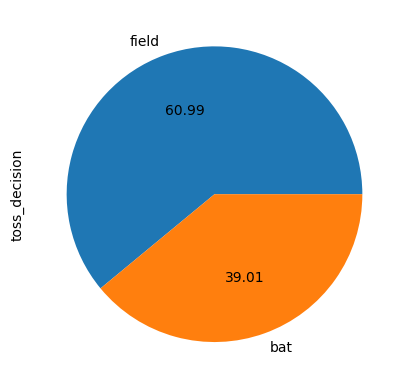

In [134]:
toss_decision_counts.plot(kind='pie',autopct="%.2f")

##Teams winning tosses and electing field first have won more number of matches

In [135]:
field_wins = df[df['toss_decision'] == 'field']['winner'].count()
bat_wins = df[df['toss_decision'] == 'bat']['winner'].count()
print(f"Number of wins when choosing to field first: {field_wins}")
print(f"Number of wins when choosing to bat first: {bat_wins}")

if field_wins > bat_wins:
    print("Teams winning tosses and electing to field first have won more matches.")
else:
    print("Teams winning tosses and electing to bat first have won more matches.")

Number of wins when choosing to field first: 108898
Number of wins when choosing to bat first: 69785
Teams winning tosses and electing to field first have won more matches.


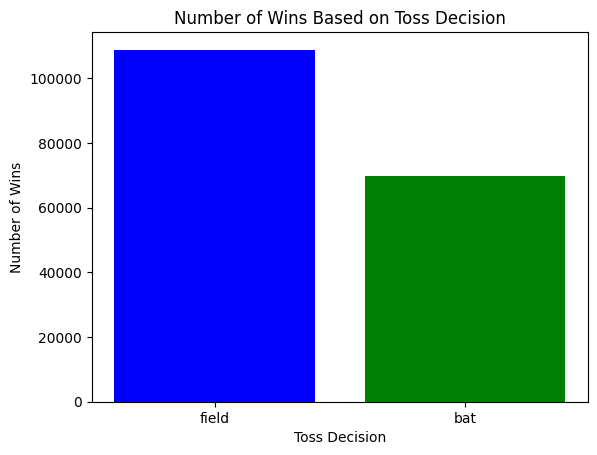

In [136]:
toss_decisions = ['field', 'bat']
wins = [field_wins, bat_wins]

plt.bar(toss_decisions, wins, color=['blue', 'green'])
plt.title('Number of Wins Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.show()

## Years where taking batting second have won more number of matches are 2008, 2011, 2014, 2015, 2016, 2017, 2018, 2019

In [137]:
batting_first = df[df['toss_decision'] == 'bat']

batting_second = df[df['toss_decision'] == 'field']

batting_first_wins_by_year = batting_first.groupby('year')['winner'].count()

batting_second_wins_by_year = batting_second.groupby('year')['winner'].count()

print("Wins when batting first by year:")
print(batting_first_wins_by_year)

print("\nWins when batting second by year:")
print(batting_second_wins_by_year)

# Identify years where teams batting second had more wins
years_with_more_wins_batting_second = batting_second_wins_by_year[batting_second_wins_by_year > batting_first_wins_by_year].index

print("\nYears where teams batting second had more wins:")
print(years_with_more_wins_batting_second)


Wins when batting first by year:
year
2008     5973
2009     8420
2010     9383
2011     5619
2012     8988
2013    10809
2014     4574
2015     5932
2016     2531
2017     2690
2018     2455
2019     2411
Name: winner, dtype: int64

Wins when batting second by year:
year
2008     7516
2009     5186
2010     5114
2011    11331
2012     8779
2013     7368
2014     9726
2015     7462
2016    11565
2017    11172
2018    11831
2019    11848
Name: winner, dtype: int64

Years where teams batting second had more wins:
Int64Index([2008, 2011, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='year')


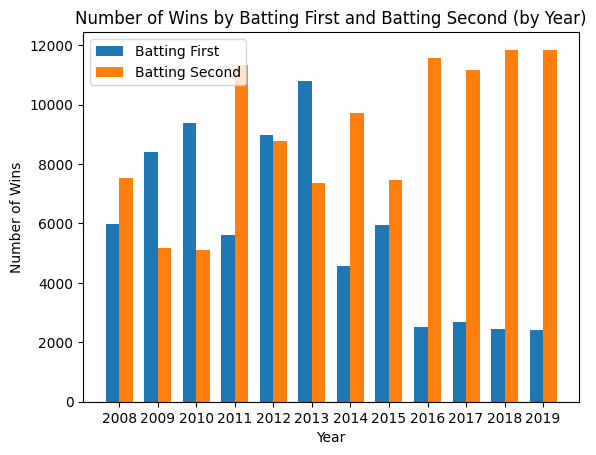

In [138]:
years = np.unique(df['year'])
bar_width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(years, batting_first_wins_by_year, bar_width, label='Batting First')
bar2 = ax.bar(years + bar_width, batting_second_wins_by_year, bar_width, label='Batting Second')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Wins')
ax.set_title('Number of Wins by Batting First and Batting Second (by Year)')
ax.set_xticks(years + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

plt.show()

## The most consistent batsmen among top 10 run getters

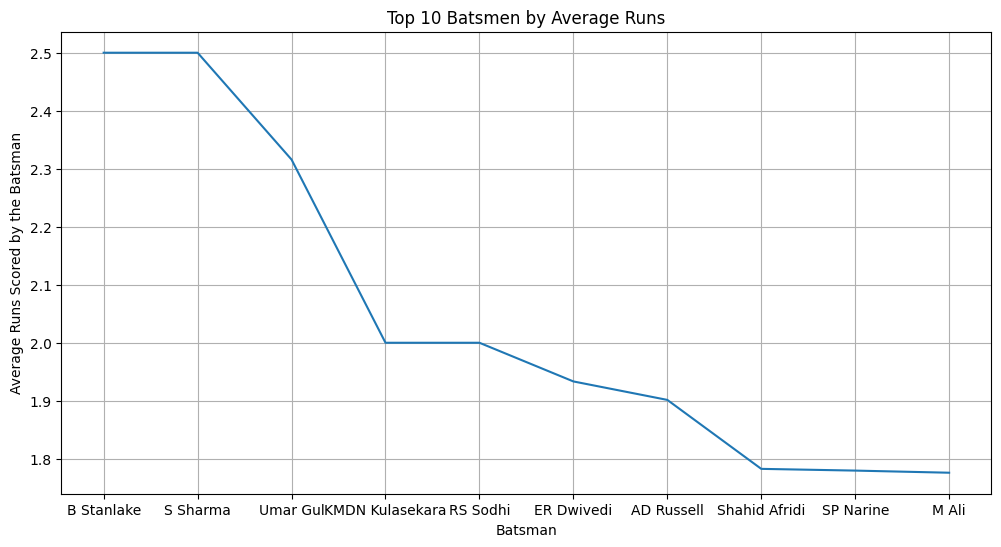

In [159]:
# Calculate average runs per batsman
average_runs = df.groupby('batsman')['total_runs'].mean().reset_index()

# Sort batsmen by average runs in descending order
top_10_batsmen = average_runs.sort_values(by='total_runs', ascending=False).head(10)

# Plot the data for the top 10 batsmen
plt.figure(figsize=(12,6))
sns.lineplot(x='batsman', y='total_runs', data=top_10_batsmen, palette='viridis')
plt.title('Top 10 Batsmen by Average Runs')
plt.xlabel('Batsman')
plt.ylabel('Average Runs Scored by the Batsman')
plt.grid(True)
plt.show()



In [140]:
pd.set_option('display.max_columns', None)

## In 2019, batsman scored highest number of runs by hitting 6's and 4's is AD Russell with 438 runs.

In [162]:
# Select rows for the year 2019 where batsman scored 4 or 6
filtered_data = df[(df['season'] == 2019) & ((df['total_runs'] == 4) | (df['total_runs'] == 6))]

# Group by batsman and calculate the total runs
runs_by_batsman = filtered_data.groupby(by='batsman')['total_runs'].sum()

# Find the batsman with the highest total runs
top_scorer = runs_by_batsman.idxmax()
highest_runs = runs_by_batsman.max()

print(f"Batsman with the highest runs in 2019 (4's and 6's): {top_scorer} with {highest_runs} runs")


Batsman with the highest runs in 2019 (4's and 6's): AD Russell with 434 runs


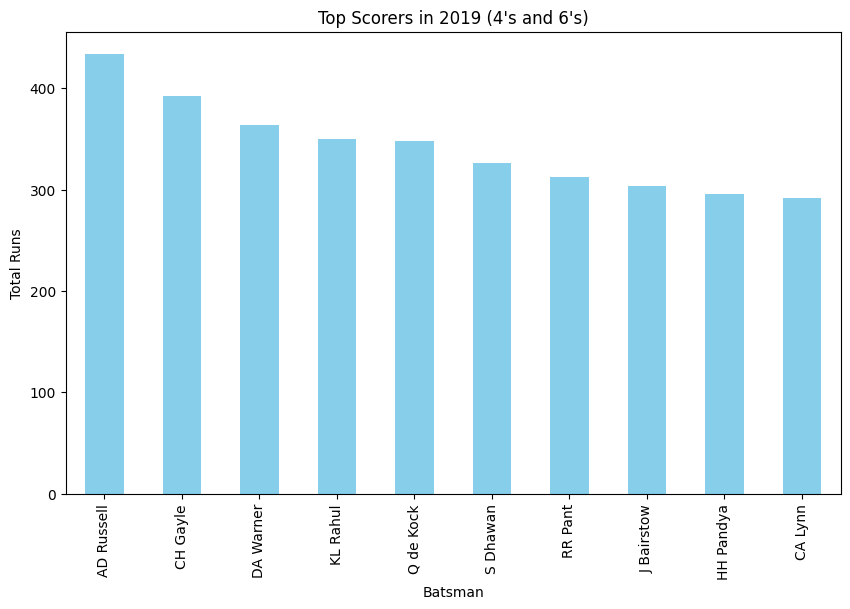

In [163]:
sorted_runs_by_batsman = runs_by_batsman.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sorted_runs_by_batsman.plot(kind='bar', color='skyblue')
plt.title('Top Scorers in 2019 (4\'s and 6\'s)')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()

## Most number of wickets taken by a bowler is SL Malinga with 188 wickets.

In [143]:
# Group by bowler and count the number of wickets
wickets_by_bowler = df[df['player_dismissed'].notnull()].groupby('bowler')['player_dismissed'].count()

# Find the bowler with the most wickets
top_bowler = wickets_by_bowler.idxmax()

# Get the number of wickets taken by the top bowler
most_wickets = wickets_by_bowler.max()

print(f"The bowler with the most wickets is {top_bowler} with {most_wickets} wickets.")


The bowler with the most wickets is SL Malinga with 188 wickets.


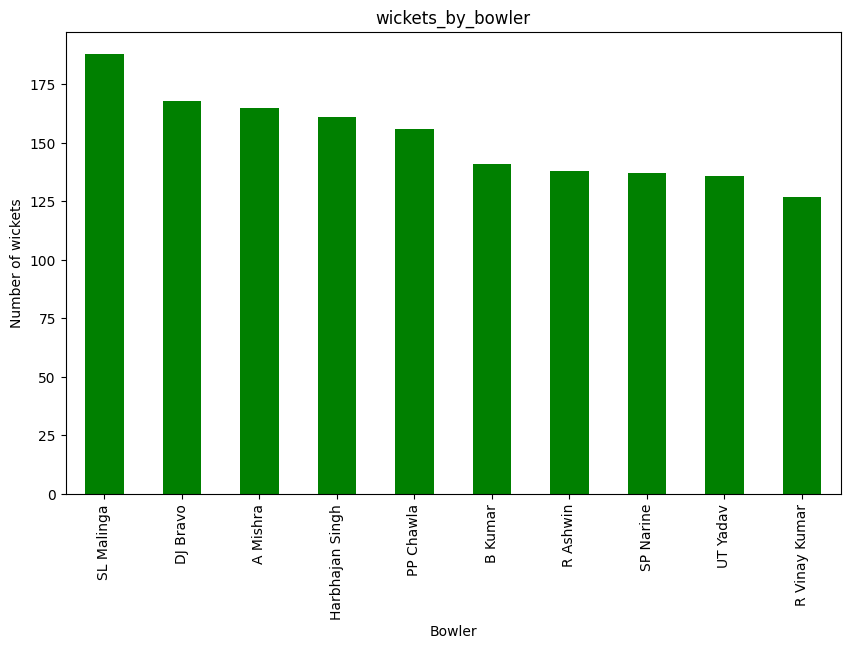

In [144]:
sorted_wickets_by_bowler = wickets_by_bowler.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sorted_wickets_by_bowler.plot(kind='bar', color='green')
plt.title('wickets_by_bowler')
plt.xlabel('Bowler')
plt.ylabel('Number of wickets')
plt.show()

##The strike rate of Kohli in 2016 is 43.34

In [165]:
total_runs_by_V_Kohli= df[((df['year']==2016)&(df['batsman']=='V Kohli'))]['batsman_runs'].sum()

total_balls_faced= df[((df['year']==2016)&(df['batsman']=='V Kohli'))]['ball'].sum()

strike_rate=(total_runs_by_V_Kohli/total_balls_faced)*100

print(f"The strike rate of Kohli in 2016 is {round(strike_rate,2)}")

The strike rate of Kohli in 2016 is 43.34


##Bowler with maximum number of extras is SL Malinga with 293 extra runs

In [146]:
bowlers_with_extra= df.groupby('bowler')['extra_runs'].sum()

top_bowler_with_extra_runs=bowlers_with_extra.idxmax()

extra_runs = bowlers_with_extra.max()

print(f"The bowler with extra runs is {top_bowler_with_extra_runs} with {extra_runs} extra runs")

The bowler with extra runs is SL Malinga with 293 extra runs


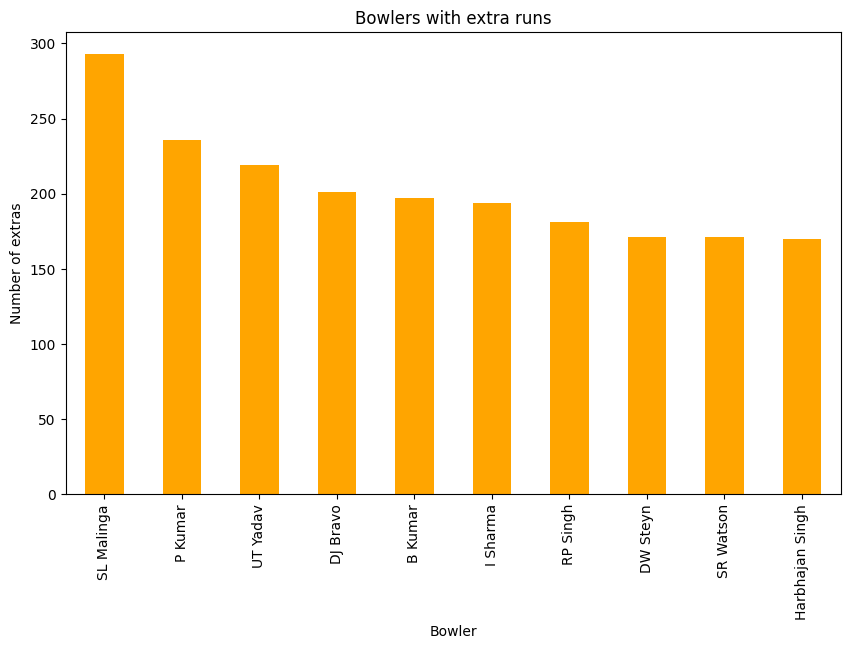

In [147]:
sorted_bowlers_with_extra = bowlers_with_extra.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sorted_bowlers_with_extra .plot(kind='bar', color='orange')
plt.title('Bowlers with extra runs')
plt.xlabel('Bowler')
plt.ylabel('Number of extras')
plt.show()

##Venue that has hosted most number of IPL matches Eden Gardens about 77 times

In [148]:
Most_hosted_venue=df.groupby('venue')['match_id'].nunique()

One_most_hosted_venue= Most_hosted_venue.idxmax()

num_of_times_hosted= Most_hosted_venue.max()

print(f"The Most hosted venue is {One_most_hosted_venue} about {num_of_times_hosted} times")

The Most hosted venue is Eden Gardens about 77 times


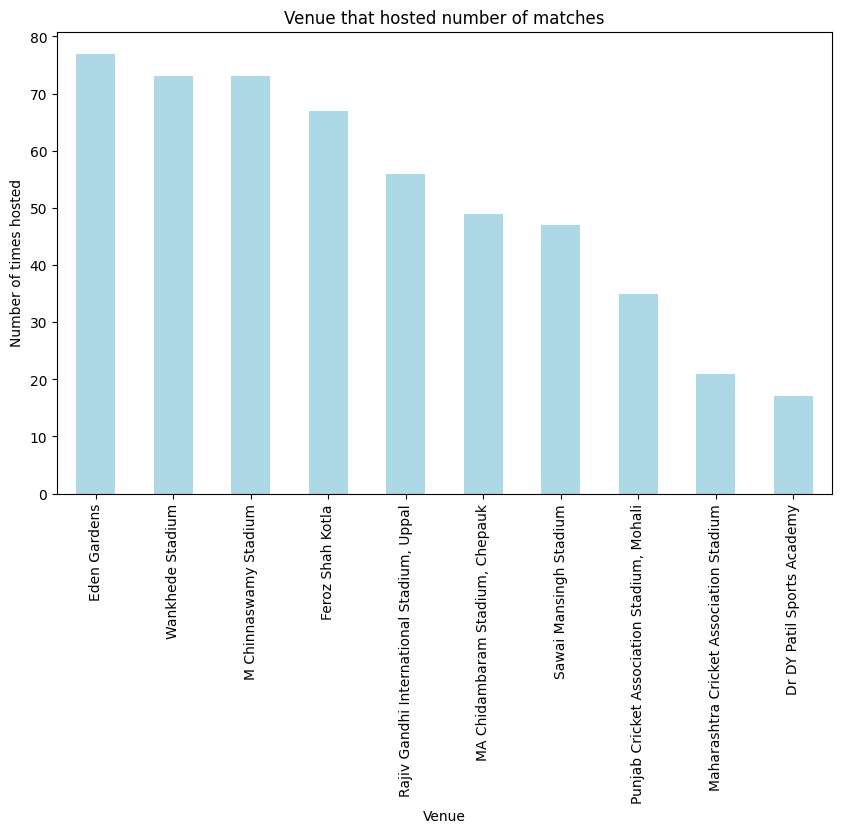

In [149]:
sorted_Most_hosted_venue = Most_hosted_venue.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sorted_Most_hosted_venue .plot(kind='bar', color='lightblue')
plt.title('Venue that hosted number of matches')
plt.xlabel('Venue')
plt.ylabel('Number of times hosted')
plt.show()

##In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore the team player won player of the match is Yuvraj Singh.

In [150]:
Player_of_match=df[(df['year']==2017) & ((df['team1']=='Sunrisers Hyderabad')& (df['team2']=='Royal Challengers Bangalore'))]['player_of_match'].value_counts()

player_name=Player_of_match.idxmax()

print(f"The player of match when Sunrisers Hyderabad played against Royal Challengers Bangalore is {player_name}")

The player of match when Sunrisers Hyderabad played against Royal Challengers Bangalore is Yuvraj Singh


## The top three batsman's with most number of run out across seasons are MS Dhoni,RG Sharma & KD Karthik

In [151]:
run_out=df[df['dismissal_kind']=='run out']['batsman'].value_counts()

players=run_out.head(3)

print(players)

top_three_batsman_most_run_out= players.index

print(f"\nThe names of the three batsman with most run out across all seasons are {top_three_batsman_most_run_out}")


MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: batsman, dtype: int64

The names of the three batsman with most run out across all seasons are Index(['MS Dhoni', 'RG Sharma', 'KD Karthik'], dtype='object')


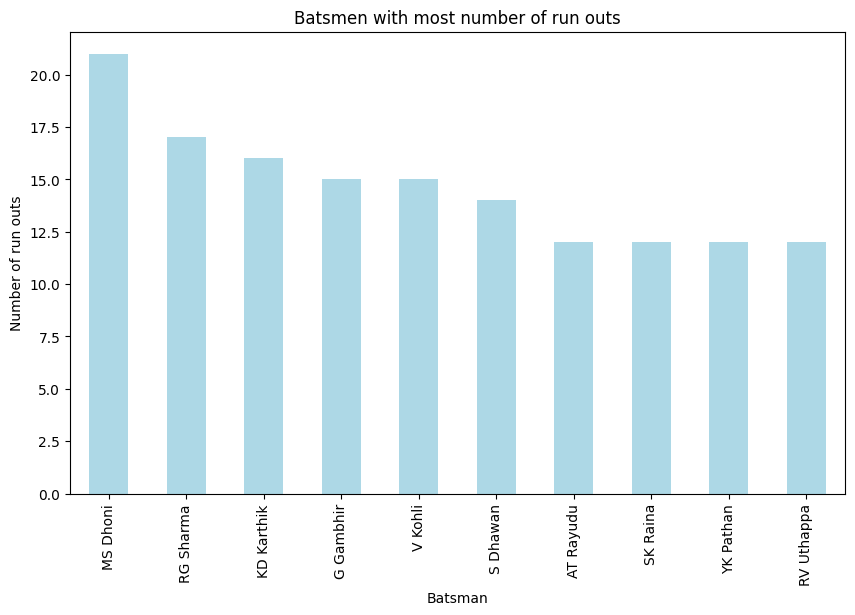

In [152]:
sorted_run_out = run_out.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sorted_run_out.plot(kind='bar', color='lightblue')
plt.title('Batsmen with most number of run outs')
plt.xlabel('Batsman')
plt.ylabel('Number of run outs')
plt.show()

## The total runs scored by V Kohli when the bowler was JJ Bumrah is 114

In [166]:
Total_run=df[(df['batsman']=='V Kohli') & (df['bowler']=='JJ Bumrah')]['total_runs'].sum()

print(f"The total runs scored by Virat Kohli when bowler was JJ Bumrah is: {Total_run}")

The total runs scored by Virat Kohli when bowler was JJ Bumrah is: 114


## Player was dismissed the maximum number of times via caught and bowled across all seasobns is SK Raina

In [154]:
player_dismissed=df[df['dismissal_kind']=='caught and bowled']['batsman'].value_counts()

player_name= player_dismissed.idxmax()

dismissal = player_dismissed.max()

print(f"The player who was most dismissed due to caught and bowled: {player_name} with {dismissal} dismissals")

The player who was most dismissed due to caught and bowled: SK Raina with 7 dismissals


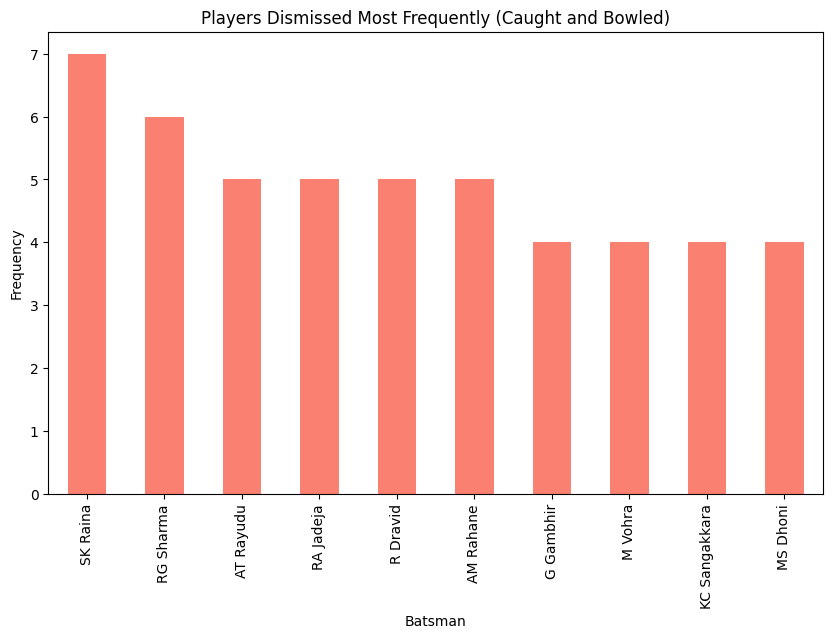

In [155]:
sorted_player_dismissed = player_dismissed.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sorted_player_dismissed.plot(kind='bar', color='salmon')
plt.title('Players Dismissed Most Frequently (Caught and Bowled)')
plt.xlabel('Batsman')
plt.ylabel('Frequency')
plt.show()

In [156]:
batting_stats = df.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'sum'}).reset_index()

batting_stats['strike_rate'] = (batting_stats['batsman_runs'] / batting_stats['ball']) * 100

batting_stats = batting_stats.sort_values(by='strike_rate', ascending=False)

top_10_hard_hitters = batting_stats.nlargest(5, 'strike_rate')

print("Batsmen sorted by strike rate:")
print(top_10_hard_hitters)



Batsmen sorted by strike rate:
        batsman  batsman_runs  ball  strike_rate
407    S Sharma             8    10    80.000000
169  I Malhotra             7    12    58.333333
485    Umar Gul            39    77    50.649351
391    S Curran            95   196    48.469388
248       M Ali           311   651    47.772657


##Player that  has the highest hard-hitting ability is AB de Villiers

In [157]:
selected_players = ['AB de Villiers', 'CH Gayle', 'MS Dhoni', 'V Kohli']

selected_players_stats = batting_stats[batting_stats['batsman'].isin(selected_players)]

print(selected_players_stats[['batsman', 'strike_rate']])


            batsman  strike_rate
26   AB de Villiers    40.905312
92         CH Gayle    40.208095
486         V Kohli    36.895709
290        MS Dhoni    36.690706
